In [1]:
import numpy as np

In [2]:
x = np.load("keras_lstm_vae-master/pred.npy")

In [4]:
print(x.shape)

(29899, 100, 3)


In [9]:
def get_data():
    # read data from file
    data = np.load("./keras_lstm_vae-master/encoded_train_150_tf.npy")
    timesteps = 100
    dataX = []
    for i in range(len(data[0:30000]) - timesteps - 1):
        x = data[i:(i+timesteps), :]
        dataX.append(x)
    return np.array(dataX)

In [10]:
x0 = get_data()

In [11]:
print(x0.shape)

(29899, 100, 3)


In [12]:
print("x: %s, preds: %s" % (x.shape, x0.shape))

x: (29899, 100, 3), preds: (29899, 100, 3)


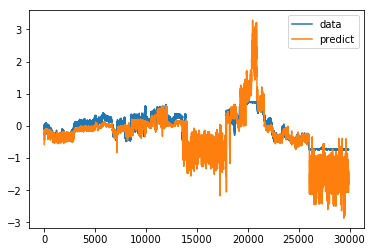

In [19]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

plt.plot(x[:,0,2], label='data')
plt.plot(x0[:,0,2], label='predict')
plt.legend()
plt.show()

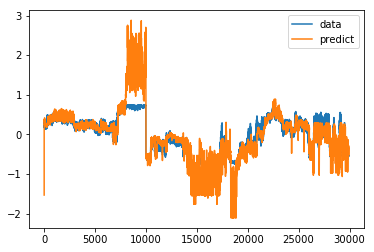

In [20]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

plt.plot(x[:,0,1], label='data')
plt.plot(x0[:,0,1], label='predict')
plt.legend()
plt.show()

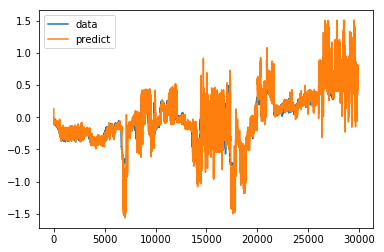

In [21]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

plt.plot(x[:,0,0], label='data')
plt.plot(x0[:,0,0], label='predict')
plt.legend()
plt.show()

In [22]:
encoder = np.load("./keras_lstm_vae-master/enc.npy")

In [23]:
print(encoder.shape)

(29899, 3)


In [26]:
x_pred_encoded = encoder

In [28]:
print(x_pred_encoded.shape)

(29899, 3)


In [32]:
label_2 = np.load("./RMSD.npy")
sep_1 = 29899
print(sep_1)
label_2 = label_2[0:int(sep_1)]
y_train_rmsd = label_2[:,1];
print(y_train_rmsd.shape)

29899
(29899,)


In [34]:
label_2 = np.load("./cont-mat_mod.npy")
sep_1 = 29899
print(sep_1)
label_2 = label_2[0:int(sep_1)]
y_train_rmsd = label_2[:,2];
print(y_train_rmsd.shape)

29899
(29899,)


In [39]:
# plot 1: 
import matplotlib.pyplot as plt;
plt.rcParams['axes.facecolor'] = 'black'

Dmax = y_train_rmsd;
[n,s] = np.histogram(Dmax, 11); 
d = np.digitize(Dmax, s);
#[n,s] = np.histogram(-np.log10(Dmax), 11); 
#d = np.digitize(-np.log10(Dmax), s);
from matplotlib import cm;
import matplotlib as mpl;
cmi = plt.get_cmap('jet');
cNorm = mpl.colors.Normalize(vmin=min(Dmax), vmax=max(Dmax));
#cNorm = mpl.colors.Normalize(vmin=140, vmax=240);
scalarMap = mpl.cm.ScalarMappable(norm=cNorm, cmap=cmi);
import numpy as np;
from mpl_toolkits.mplot3d import Axes3D;
fig = plt.figure(figsize=(8.5,6));
ax = fig.add_subplot(111, projection='3d');
# scatter3D requires a 1D array for x, y, and z;
# ravel() converts the 100x100 array into a 1x10000 array;
p = ax.scatter3D(np.ravel(x_pred_encoded[:, 0]),
            np.ravel(x_pred_encoded[:, 1]),
           np.ravel(x_pred_encoded[:, 2]), 
            marker='.', c=scalarMap.to_rgba(Dmax));
ax.set_xlim3d(np.amin(np.ravel(x_pred_encoded[:, 0])), np.amax(np.ravel(x_pred_encoded[:, 0])));
ax.set_ylim3d(np.amin(np.ravel(x_pred_encoded[:, 1])), np.amax(np.ravel(x_pred_encoded[:, 1])));
ax.set_zlim3d(np.amin(np.ravel(x_pred_encoded[:, 2])), np.amax(np.ravel(x_pred_encoded[:, 2])));
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='white')
#ax.xaxis.label.set_color('white')
#ax.yaxis.label.set_color('white')
#ax.zaxis.label.set_color('white')
#ax.set_xlabel('VAE 0');
#ax.set_ylabel('VAE 1');
#ax.set_zlabel('VAE 2');
scalarMap.set_array(Dmax);
fig.colorbar(scalarMap);
#plt.show()
plt.savefig('./encoded_train_3D_frac.png', dpi=600);
plt.clf();